# Evaluate Single Algorithm on One Dataset (Single Run)

This notebook runs one decision tree algorithm on one shape using one seed, evaluates it across depths, and visualizes the results.


In [1]:
from C_oblique_decision_trees.visualization.single_run_plots import (plot_coverage_density_for_shape, 
                                                                     plot_decision_regions_from_dict, 
                                                                     plot_oblique_splits_from_dict,
                                                                     plot_oblique_splits_clipped)
from C_oblique_decision_trees.evaluation.benchmark_runner import DepthSweepRunner
from C_oblique_decision_trees.evaluation.io_utils import load_trees_dict, load_depth_sweep_df

from _adopted_oblique_trees.segmentor import CARTSegmentor
from _adopted_oblique_trees.split_criteria import gini

from src.load_shapes import load_shape_dataset

In [2]:
# Load & scale dataset
datasets = load_shape_dataset()


Paired Datasets available are: ['barbell_2d_fuzziness_000', 'barbell_3d_fuzziness_000', 'radial_segment_2d_fuzziness_000', 'radial_segment_3d_fuzziness_000', 'rectangle_2d_fuzziness_000', 'saddle_3d_fuzziness_000', 'sine_wave_2d_fuzziness_000', 'star_2d_fuzziness_000', 'barbell_2d_fuzziness_003', 'barbell_3d_fuzziness_003', 'radial_segment_2d_fuzziness_003', 'radial_segment_3d_fuzziness_003', 'rectangle_2d_fuzziness_003', 'saddle_3d_fuzziness_003', 'sine_wave_2d_fuzziness_003', 'star_2d_fuzziness_003', 'barbell_2d_fuzziness_005', 'barbell_3d_fuzziness_005', 'radial_segment_2d_fuzziness_005', 'radial_segment_3d_fuzziness_005', 'rectangle_2d_fuzziness_005', 'saddle_3d_fuzziness_005', 'sine_wave_2d_fuzziness_005', 'star_2d_fuzziness_005', 'barbell_2d_fuzziness_007', 'barbell_3d_fuzziness_007', 'radial_segment_2d_fuzziness_007', 'radial_segment_3d_fuzziness_007', 'rectangle_2d_fuzziness_007', 'saddle_3d_fuzziness_007', 'sine_wave_2d_fuzziness_007', 'star_2d_fuzziness_007']


In [3]:
# Configuration
max_depth = 4
seed = 1
impurity = gini
segmentor = CARTSegmentor()
algorithm = "co2"  # Options: "hhcart_a", "hhcart_d", "randcart", "oc1", "wodt", "co2", "ridge_cart", "cart"
dataset = "barbell_2d_fuzziness_007"

In [4]:
datasets_dict = {
    dataset: datasets[dataset]
}
X, y = datasets[dataset]

In [5]:
# Build registry with user-defined components
full_registry = DepthSweepRunner.build_registry(
    random_state=seed,
    impurity=impurity,
    segmentor=segmentor,
    n_rotations=3
)

In [6]:
# Define a custom registry for specific models
registry = {algorithm: full_registry[algorithm]}

In [7]:
# Create and run
runner = DepthSweepRunner(datasets=datasets_dict, max_depth=max_depth)
df_no_noise, trees_dict_no_noise = runner.run(
    fixed_seed=seed,
    registry=registry,
    auto_export=True,
    filename=f"{algorithm}_{dataset}.csv",
    tree_dict_filename=f"{algorithm}_{dataset}.pkl"
)

Depth Sweeping: 100%|██████████| 5/5 [01:31<00:00, 18.23s/it]

[OK] Saved DataFrame to: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\_data\depth_sweep_single_run_results\co2_barbell_2d_fuzziness_007.csv
[OK] Saved trees_dict to: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\_data\depth_sweep_single_run_results\co2_barbell_2d_fuzziness_007.pkl


In [8]:
dataframe_no_noise = load_depth_sweep_df(filename=f"{algorithm}_{dataset}.csv")
dict_no_noise = load_trees_dict(filename=f"{algorithm}_{dataset}.pkl")

[OK] Loaded DataFrame from: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\_data\depth_sweep_single_run_results\co2_barbell_2d_fuzziness_007.csv
[OK] Loaded trees_dict from: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\_data\depth_sweep_single_run_results\co2_barbell_2d_fuzziness_007.pkl


[✓] Saved clipped split figure: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\_data\depth_sweep_single_run_results\plot_of_clipped_splits_co2_barbell_2d_fuzziness_007.pdf


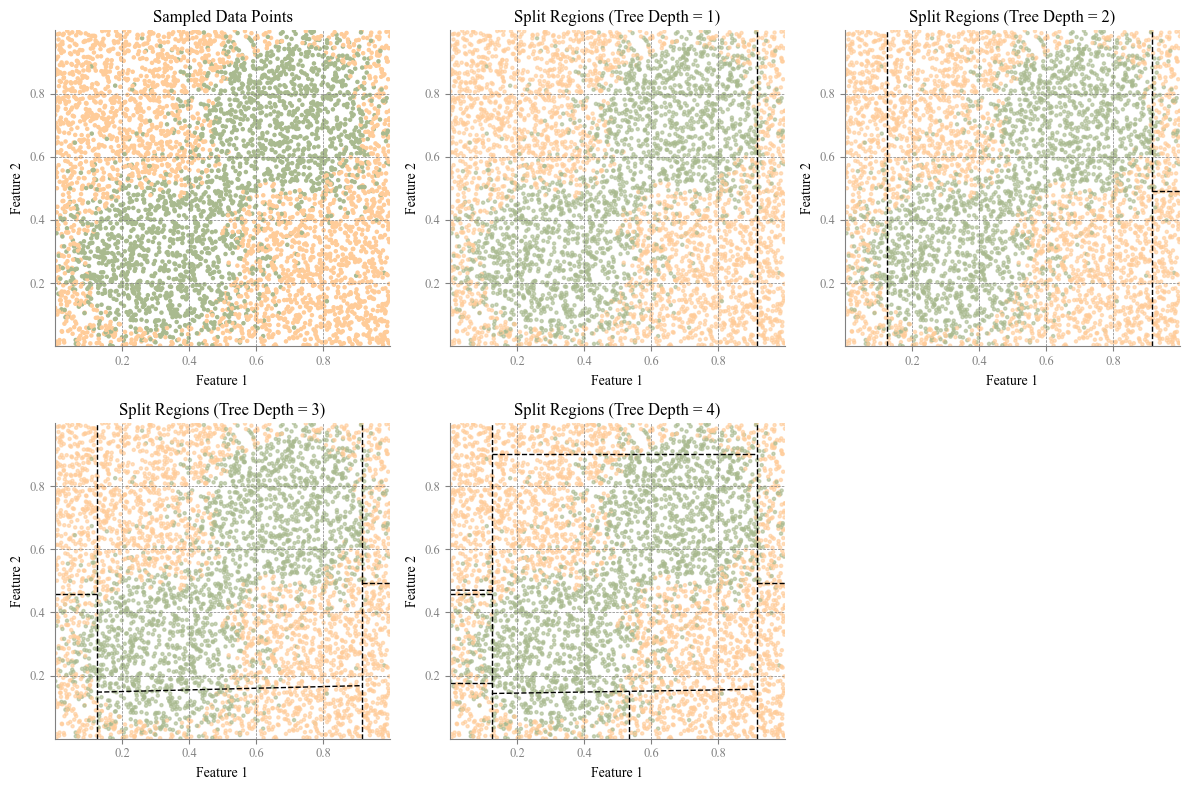

In [9]:
plot_oblique_splits_clipped(X, y, dict_no_noise, max_depth=max_depth, save_name=f"plot_of_clipped_splits_{algorithm}_{dataset}.pdf")

[✓] Saved oblique split figure: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\_data\depth_sweep_single_run_results\plot_of_splits_co2_barbell_2d_fuzziness_007.pdf


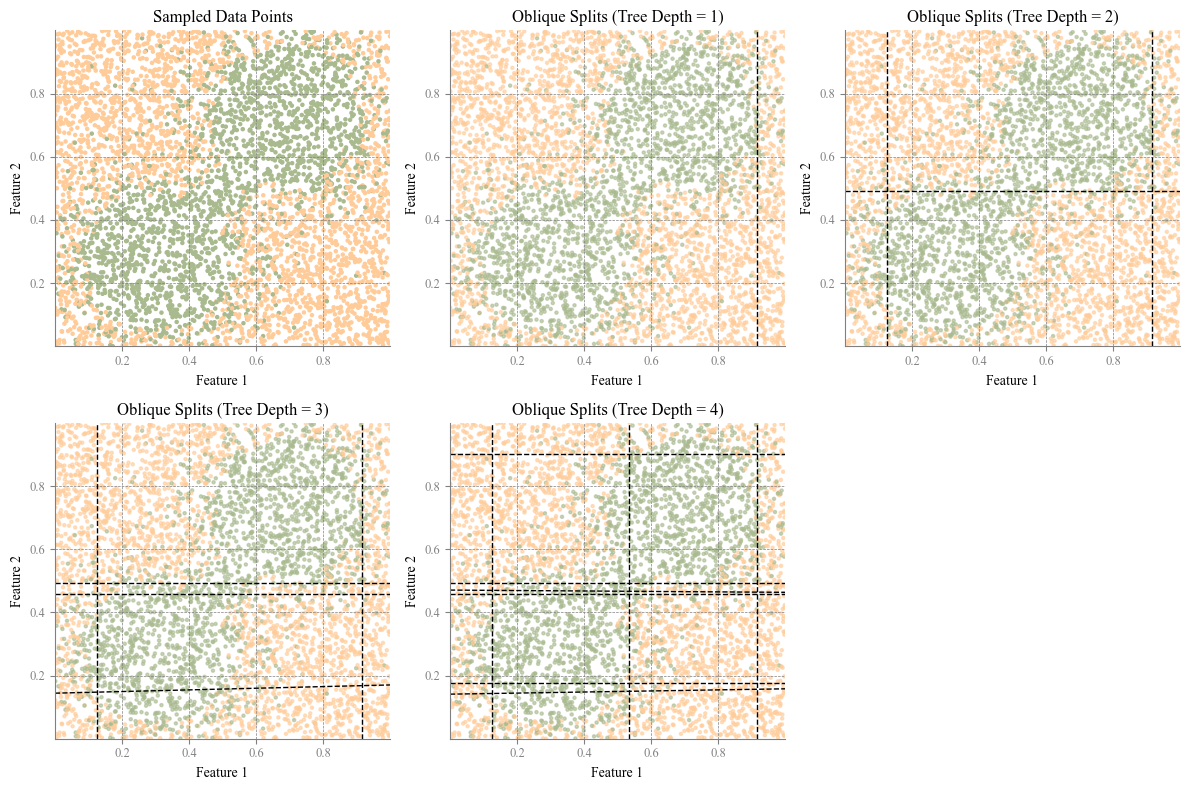

In [10]:
plot_oblique_splits_from_dict(X, y, dict_no_noise, max_depth, save_name=f"plot_of_splits_{algorithm}_{dataset}.pdf")

[✓] Saved decision region figure: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\_data\depth_sweep_single_run_results\decision_region_co2_barbell_2d_fuzziness_007.pdf


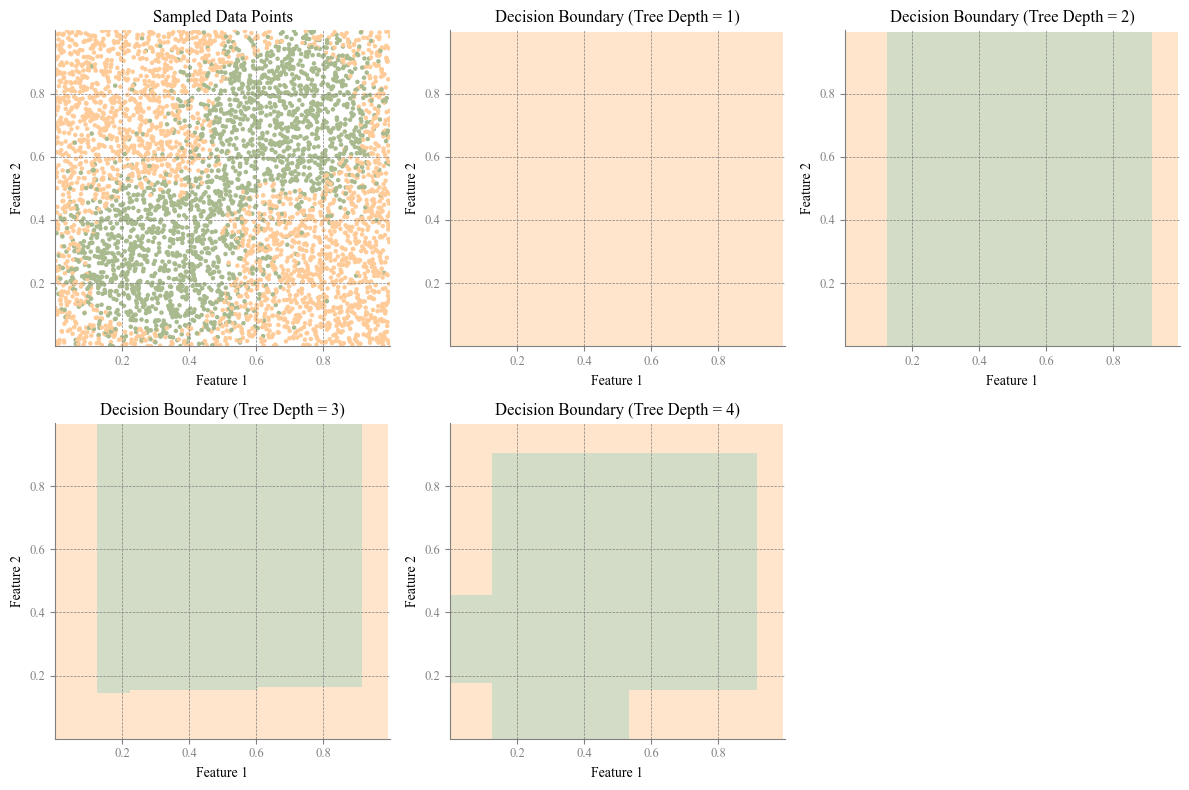

In [11]:
plot_decision_regions_from_dict(X, y, dict_no_noise, max_depth=max_depth, save_name=f"decision_region_{algorithm}_{dataset}.pdf")

In [ ]:
plot_coverage_density_for_shape(dataframe_no_noise, save_name=f"coverage_vs_density_{algorithm}_{dataset}.pdf")